In [2]:
import torch 
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()])) 

test = datasets.MNIST('', train=False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()])) 

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True )

In [5]:
#Build the model

import torch.nn as nn
import torch.nn.functional as f

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self,x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = f.relu(self.fc4(x))
        return x
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [24]:
#Train the model

import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHES = 3
for epoch in range(EPOCHES): 
    for data in trainset:  
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  
        loss = f.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  

tensor(0.0187, grad_fn=<NllLossBackward>)
tensor(0.3995, grad_fn=<NllLossBackward>)
tensor(0.0013, grad_fn=<NllLossBackward>)


In [25]:
#Test the accuracy

correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.974


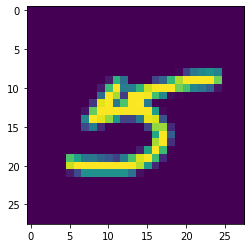

The prediction is:  5


In [40]:
#See for yourself

import matplotlib.pyplot as plt

def test_with_an_image(index=0):
    plt.imshow(X[index].view(28,28))
    plt.show()
    prediction = torch.argmax(net(X[index].view(-1,784)))
    print('The prediction is: ',int(prediction))
    
test_with_an_image(3)